# Project: Wrangling and Analyze Data

### Introduction
The dataset  is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

In [328]:
#importing the required libaries
import pandas as pd
import numpy as np
import requests
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re

## Data Gathering


In [329]:
# Read the the csv file
archive = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')
archive.head(105)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [330]:
# displayong full dataframe of both rows and columns

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

C:\Users\HEWLETTE\AppData\Local\Temp/ipykernel_17456/584899059.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [331]:
# Use requests library to programmatically download tsv file from Udacity's server

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)

with open('image_predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [332]:
image_predictions=pd.read_csv('image_predictions.tsv',sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [333]:

# code to check if able to access tweet_jsom.text
with open ('tweet_json.txt',encoding='utf-8') as file:
    for item in file.readlines():
        item =json.loads(item)
        tweet_ID=item['id']
        time_created=item['created_at']
        print(time_created)
        break

Tue Aug 01 16:23:56 +0000 2017


In [334]:
#r eading the data from the text file into dataframe
df_list = []
with open('tweet_json.txt') as file:
    for item in file.readlines():
        item = json.loads(item)
        tweet_id =item['id']
        day_created =item['created_at'][:3]
        text =item['full_text']
        retweet_count = item['retweet_count']
        favorite_count = item['favorite_count']
      
        df_list.append({'tweet_id':  tweet_id,
                        'text':text,
                        'weekday':day_created,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [335]:
# length of tweetid
tweet_ids = archive.tweet_id.values
len(tweet_ids)

2356

In [336]:
# create the column for dataframe
tweet_count = pd.DataFrame(df_list, columns = ['tweet_id','text','weekday', 'retweet_count', 'favorite_count'])

In [337]:
tweet_count.head()

,tweet_id,text,weekday,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Tue,8853,39467
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tue,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Mon,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Sun,8964,42908
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Sat,9774,41048


## Assessing Data



In [338]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [339]:
# Check for duplicates in the data
archive['tweet_id'].duplicated().sum()

0

In [340]:

# value count for  each rating_denominator
archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
20     2   
80     2   
70     1   
7      1   
15     1   
150    1   
170    1   
0      1   
90     1   
40     1   
130    1   
110    1   
16     1   
120    1   
2      1   
Name: rating_denominator, dtype: int64

In [341]:
#rating_numerator and denorminator not egual to 10
col=['tweet_id','text','rating_numerator','rating_denominator']
archive[archive.rating_denominator!=10][col]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [342]:
sum(archive.rating_denominator!=10)

23

In [343]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
2       9  
1       9  
75      2  
15      2  
420     2  
0       2  
80      1  
144     1  
17      1  
26      1  
20      1  
121     1  
143     1  
44      1  
60      1  
45      1  
50      1  
99      1  
204     1  
1776    1  
165     1  
666     1  
27      1  
182     1  
24      1  
960     1  
84      1  
88      1  
Name: rating_numerator, dtype: int64

In [344]:
# descriptive representation of achieve
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [345]:
# Checking name column
archive.name.head(20)

0     Phineas 
1     Tilly   
2     Archie  
3     Darla   
4     Franklin
5     None    
6     Jax     
7     None    
8     Zoey    
9     Cassie  
10    Koda    
11    Bruno   
12    None    
13    Ted     
14    Stuart  
15    Oliver  
16    Jim     
17    Zeke    
18    Ralphus 
19    Canela  
Name: name, dtype: object

In [346]:
# Checking name column
archive.name.tail(20)

2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2345    the 
2346    the 
2347    a   
2348    a   
2349    an  
2350    a   
2351    None
2352    a   
2353    a   
2354    a   
2355    None
Name: name, dtype: object

In [347]:
# List all names that aren't capitalized
wrong_names =archive.name.str.contains('^[a-z]', regex = True)
archive[wrong_names].name.value_counts().sort_index()

a               55
actually        2 
all             1 
an              7 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            4 
life            1 
light           1 
mad             2 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           4 
space           1 
such            1 
the             8 
this            1 
unacceptable    1 
very            5 
Name: name, dtype: int64

In [348]:

# length of wrong name
len(archive[wrong_names])

109

In [349]:
#general information about the csv file
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [350]:
# descriptive information on the csv file
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [351]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   text            2354 non-null   object
 2   weekday         2354 non-null   object
 3   retweet_count   2354 non-null   int64 
 4   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [352]:
tweet_count.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1. Timestamp should be in date datatype not object

2. for archive the source column ,drop irrelevant text to just the source

3.  Remove all row for which columns related to retweets are not null.

4. Dropping columns not needed for analysis 

5. tweet_id should be in strings
6. There are 109 non-capitalized words which forms an invalid name

7. the minimum for both numerator and denominator is 0 (it should be "10") and and the maximum for both is very huge.

8. Column headers for image_prediction dataframe are not discriptive

### Tidiness issues
1.archieve, image_predictions and tweet_counts should be merged

2 doggo,floofer,pupper,puppo could be melted into 1 column instead of 4


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [353]:
# Make copies of original pieces of data

archive_clean =archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_count_clean = tweet_count.copy()


### Quality

### Issue #1:Timestamp should be in date datatype not object

#### Define:  To change the timestamp from string to date datatype

#### Code

In [354]:
# converting the datatype
archive_clean['timestamp']=pd.to_datetime(archive_clean['timestamp'])

#### Test

In [355]:

archive_clean.timestamp.dtype

datetime64[ns, UTC]

### Issue #2: for archive  dataframe.The source column ,drop irrelevant text to just the source

#### Define : To make the source column definite, i,e  twitter from iphone

#### Code

In [356]:
# function that remove tags
def remove(string):
    results = re.sub('<.*?>','',string)
    return results
archive_clean['source']=archive_clean['source'].apply(lambda x : remove(x))

#### Test

In [357]:

archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64

## issue #3 : Remove retweets are not null.

### Define : Remove all row for which columns related to retweets are not null.

### Code

In [358]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

In [359]:
archive_clean.retweeted_status_id.isnull().sum()

2175

In [360]:
archive_clean.retweeted_status_user_id.isnull().sum()

2175

In [361]:
archive_clean.retweeted_status_timestamp.isnull().sum()

2175

In [362]:
archive_clean.drop(['retweeted_status_id',
         'retweeted_status_user_id',
         'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [363]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### Issue #4: Dropping columns not needed for analysis

#### Define: using the drop fuction to remove some features that are not needed ("in_reply_to_status_id", "in_reply_to_user_id", )

### code

In [364]:
archive_clean = archive_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id"], axis=1)


### Test

In [365]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #5: tweet_id should be in strings

### Define: converting the tweet_id from int to string


### code

In [366]:
# Convert 'tweet_id' type from int to str
archive_clean['tweet_id']=archive_clean['tweet_id'].astype(str)


In [367]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)



In [368]:
tweet_count_clean['tweet_id'] = tweet_count_clean['tweet_id'].astype(str)

### Test

In [369]:

archive_clean.tweet_id.dtype

dtype('O')

In [370]:
image_predictions_clean.tweet_id.dtype

dtype('O')

In [371]:
tweet_count_clean.tweet_id.dtype

dtype('O')

### Issue #6 : There are 109 non-capitalized words which forms an invalid name


### Define: replacing lower case with upper case

### code

In [372]:
mask = archive_clean['name'].str.islower()
archive_clean.loc[(mask), 'name'] = np.NaN
archive_clean['name'] = archive_clean['name'].replace('None', np.NaN)

### Test

In [373]:
archive_clean['name'].tail(100)

2254    NaN       
2255    NaN       
2256    Calvin    
2257    Olive     
2258    NaN       
2261    NaN       
2262    George    
2263    Kial      
2264    NaN       
2265    Frank     
2266    Naphaniel 
2267    NaN       
2268    Dook      
2269    NaN       
2270    Hall      
2271    Philippe  
2272    NaN       
2273    NaN       
2274    Reese     
2275    Cupcake   
2276    NaN       
2277    NaN       
2278    NaN       
2279    Biden     
2280    Fwed      
2281    NaN       
2282    Genevieve 
2283    Joshwa    
2284    NaN       
2285    NaN       
2286    Timison   
2287    NaN       
2288    NaN       
2289    Clarence  
2290    Kenneth   
2291    Churlie   
2292    Bradlay   
2293    Pipsy     
2294    NaN       
2295    Gabe      
2296    Clybe     
2297    Dave      
2298    NaN       
2299    NaN       
2300    Keet      
2301    NaN       
2302    Klevin    
2303    Carll     
2304    NaN       
2305    NaN       
2306    NaN       
2307    NaN       
2308    Jeph

### Issue #7: the minimum for both numerator and denominator is 0 (it should be "10") and and the maximum for both is very huge.

### Define:  keep only rows where denominator is 10

### code

In [374]:
archive_clean = archive_clean[(archive_clean.rating_numerator > 0) & (archive_clean.rating_numerator < 50) &
(archive_clean.rating_denominator == 10)]

### Test

In [375]:
archive_clean.describe()

,rating_numerator,rating_denominator
count,2145.000000,2145.0
mean,10.646620,10.0
std,2.228561,0.0
min,1.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,27.000000,10.0


### Issue #8: Column headers for image_prediction dataframe are not discriptive

### Define:

In [376]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### code

In [377]:
image_predictions_clean=image_predictions_clean.rename (columns={'img_num':'image_number',
                        'p1': 'prediction_1',
                        'p1_conf':'prediction_1_confidence',
                        'p1_dog':'prediction_1_dog',
                        'p2': 'prediction_2',
                        'p2_conf':'prediction_2_confidence',
                        'p2_dog':'prediction_2_dog',
                        'p3': 'prediction_3',
                        'p3_conf':'prediction_3_confidence',
                        'p3_dog':'prediction_3_dog'})

### Test

In [378]:
image_predictions_clean.head()

,tweet_id,jpg_url,image_number,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tideness

### Issue #1: archieve, image_predictions and tweet_counts should be merged

### Define: merge the three tables together

### code

In [379]:
tweet_df = pd.merge(archive_clean, image_predictions_clean, on = ['tweet_id'], how = 'left')


In [380]:
tweet_df =tweet_df.merge(tweet_count_clean ,on = ['tweet_id','text'], how = 'left')

### Test

In [381]:
tweet_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,weekday,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,Tue,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Tue,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,Mon,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Sun,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Sat,9774,41048


### Issue #2: doggo,floofer,pupper,puppo could be melted into 1 column instead of 4

### Define:  to melt all dog to one column

### code

In [382]:

# replace all the NONE in doggo,floofer, pupper, puppo column TO EMPTY 

tweet_df.doggo.replace('None','',inplace = True)
tweet_df.floofer.replace('None','',inplace = True)
tweet_df.pupper.replace('None','',inplace = True)
tweet_df.puppo.replace('None','',inplace = True)

In [383]:
#checking doggo column
tweet_df.doggo.value_counts()

         2058
doggo    87  
Name: doggo, dtype: int64

In [384]:
# creating new colum called breed for all dogs
tweet_df['breed'] = tweet_df.doggo+tweet_df.floofer+tweet_df.pupper+tweet_df.puppo

In [385]:
#value count for breed colum
tweet_df.breed.value_counts()

                1801
pupper          224 
doggo           75  
puppo           24  
doggopupper     10  
floofer         9   
doggopuppo      1   
doggofloofer    1   
Name: breed, dtype: int64

In [386]:
#To seperate doggopupper,doggopuppo, doggofloofer
tweet_df.loc[tweet_df.breed == 'doggopupper', 'breed'] = 'doggo,pupper'
tweet_df.loc[tweet_df.breed == 'doggopuppo', 'breed'] = 'doggo,puppo'
tweet_df.loc[tweet_df.breed == 'doggofloofer', 'breed'] = 'doggo,floofer'

In [387]:
# To replace '' values to NaN values
tweet_df.loc[tweet_df.breed == '', 'breed'] = np.nan

In [388]:
#drop the doggo,floofer,pupper,puppo columns
tweet_df.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [389]:
#i changed the column name breed to breed_size
tweet_df.rename(columns={'breed': 'breed_size'}, inplace=True)

### Test

In [390]:
tweet_df.head(150)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,image_number,...,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,weekday,retweet_count,favorite_count,breed_size
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,bagel,0.085851,False,banana,0.076110,False,Tue,8853,39467,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,Pekinese,0.090647,True,papillon,0.068957,True,Tue,6514,33819,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,malamute,0.078253,True,kelpie,0.031379,True,Mon,4328,25461,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,Sun,8964,42908,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Sat,9774,41048,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Sat,3261,20562,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,...,Border_collie,0.199287,True,ice_lolly,0.193548,False,Fri,2158,12041,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,Fri,16716,56848,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.c

## Storing Data


In [391]:
# storing the clean data as 'twitter_archive_master.csv'
tweet_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Most popular Breed size

In [392]:
# value counts of breed
type=tweet_df['breed_size'].value_counts()
type

pupper           224
doggo            75 
puppo            24 
doggo,pupper     10 
floofer          9  
doggo,puppo      1  
doggo,floofer    1  
Name: breed_size, dtype: int64

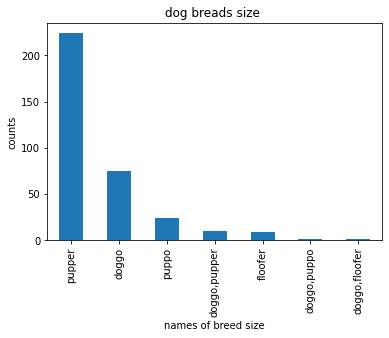

In [393]:
type.plot.bar()
plt.title('dog breads size ')
plt.xlabel('names of breed size')
plt.ylabel('counts')
plt.savefig('breedsize.jpeg')

With this analysis its shows that the common breed size people have is pupper with 224 counts

### Most tweet on Weekdays

In [394]:
# value counts for weekdays
week_day=tweet_df['weekday'].value_counts()
week_day

Mon    353
Tue    324
Wed    320
Thu    301
Fri    298
Sat    281
Sun    268
Name: weekday, dtype: int64

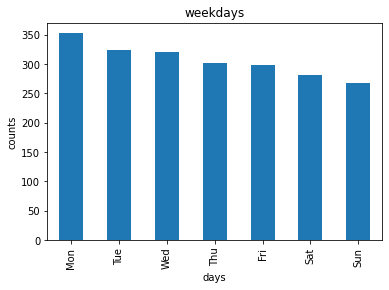

In [402]:
week_day.plot.bar()
plt.title('weekdays')
plt.xlabel('days')
plt.ylabel('counts')
plt.savefig('image1.jpeg')

 The analysis and visualize shows that the tweet varies from monday to sunday but people tweet mostly on Monday

### Common Dogs breed

In [396]:
tweet_df['prediction_1'].value_counts()

golden_retriever                  135
Labrador_retriever                92 
Pembroke                          88 
Chihuahua                         79 
pug                               54 
chow                              41 
Samoyed                           40 
toy_poodle                        38 
Pomeranian                        37 
malamute                          29 
cocker_spaniel                    27 
French_bulldog                    26 
Chesapeake_Bay_retriever          23 
miniature_pinscher                22 
seat_belt                         21 
German_shepherd                   20 
Staffordshire_bullterrier         19 
Siberian_husky                    19 
Shetland_sheepdog                 18 
Eskimo_dog                        18 
teddy                             17 
Cardigan                          17 
Shih-Tzu                          17 
beagle                            17 
Maltese_dog                       17 
Rottweiler                        17 
Italian_grey

In [397]:
tweet_df['prediction_2'].value_counts()

Labrador_retriever                96
golden_retriever                  80
Cardigan                          72
Chihuahua                         41
Chesapeake_Bay_retriever          40
Pomeranian                        39
French_bulldog                    39
toy_poodle                        35
Siberian_husky                    33
miniature_poodle                  32
cocker_spaniel                    30
beagle                            28
Eskimo_dog                        27
collie                            26
Pembroke                          25
Italian_greyhound                 22
Pekinese                          21
kuvasz                            21
miniature_pinscher                20
chow                              20
malinois                          20
toy_terrier                       19
Norwegian_elkhound                19
Boston_bull                       19
American_Staffordshire_terrier    19
Samoyed                           18
Staffordshire_bullterrier         18
p

In [398]:
tweet_df['prediction_3'].value_counts()

Labrador_retriever                74
Chihuahua                         57
golden_retriever                  45
Eskimo_dog                        35
kelpie                            33
kuvasz                            31
beagle                            30
cocker_spaniel                    29
toy_poodle                        29
chow                              29
Staffordshire_bullterrier         29
Pekinese                          28
Pomeranian                        27
Pembroke                          26
malamute                          25
French_bulldog                    25
Great_Pyrenees                    25
Chesapeake_Bay_retriever          24
Cardigan                          23
American_Staffordshire_terrier    22
basenji                           20
pug                               20
bull_mastiff                      19
Siberian_husky                    19
toy_terrier                       18
Shetland_sheepdog                 17
Boston_bull                       17
L

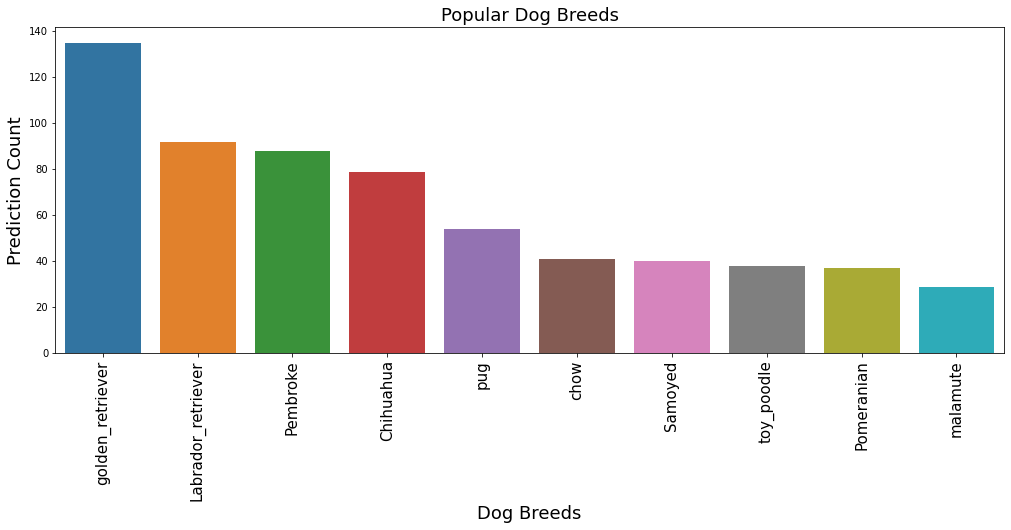

In [399]:
#prediction one

plt.figure(figsize = (17,6))
ax = sb.barplot(x = tweet_df['prediction_1'].value_counts()[0:10].index,
            y =tweet_df['prediction_1'].value_counts()[0:10],
            data = tweet_df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);
plt.savefig('p1.jpeg')

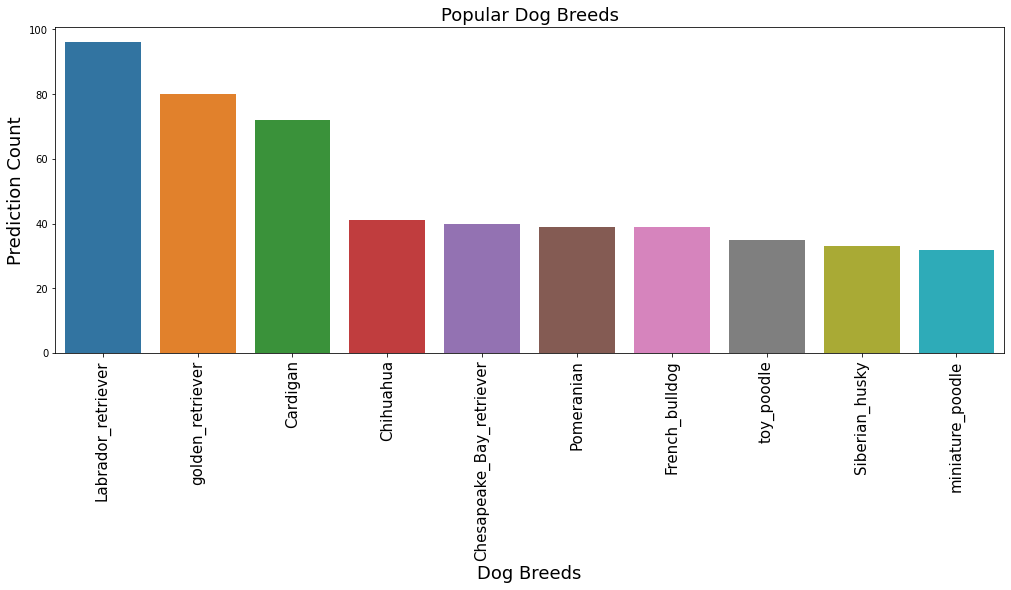

In [400]:
#prediction two
plt.figure(figsize = (17,6))
ax = sb.barplot(x = tweet_df['prediction_2'].value_counts()[0:10].index,
            y =tweet_df['prediction_2'].value_counts()[0:10],
            data = tweet_df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);
plt.savefig('p2.jpeg')

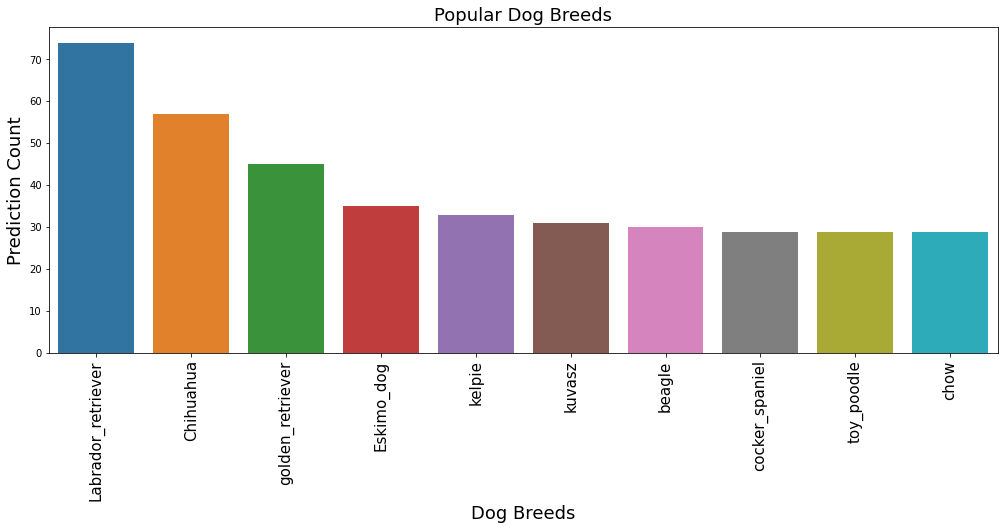

In [401]:
# prediction three
plt.figure(figsize = (17,6))
ax = sb.barplot(x = tweet_df['prediction_3'].value_counts()[0:10].index,
            y =tweet_df['prediction_3'].value_counts()[0:10],
            data = tweet_df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);
plt.savefig('p3.jpeg')

The popular  Dog breed for each prediction varies 


* For prediction 1 ,the popular dog breed is golden_retriever  with 135 counts
* For prediction 2 ,the popular dog breed is Labrador_retriever with 96 counts
* For prediction 3 ,the popular dog breed is Labrador_retriever with 74 counts



### Insights:
1.The most common bread size is pupper with 235 counts

2.the tweet varies during the days of the week but monday has high tweet count

3.The most common bread  for the three prediction 